In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

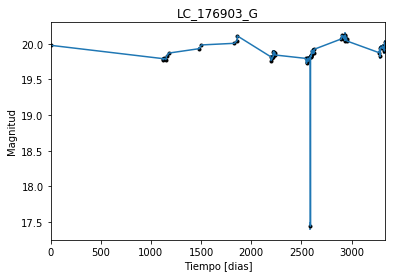

In [2]:
data = np.genfromtxt('LC_176903_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_176903_G')
plt.savefig("LC_176903_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

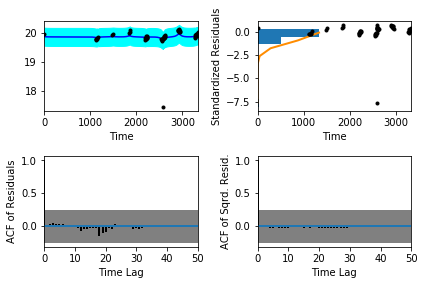

In [5]:
sample.assess_fit()

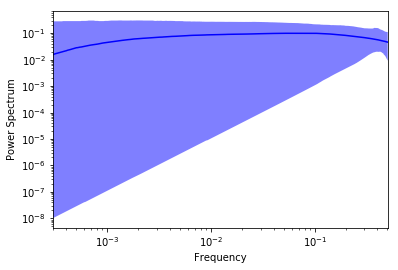

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

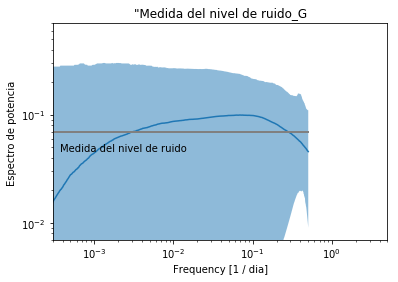

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_176903_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_176903_G')

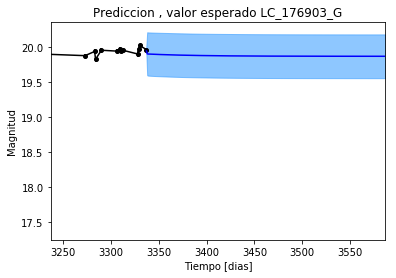

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_176903_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_176903_G')

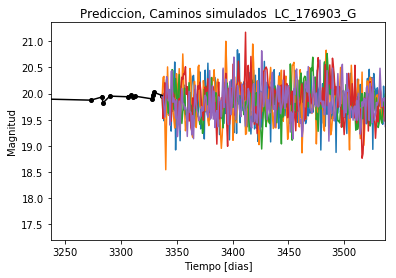

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_176903_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


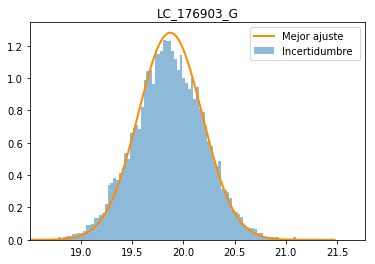

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_176903_G')
plt.savefig("Mejor_ajuste_LC_176903_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_176903_G')

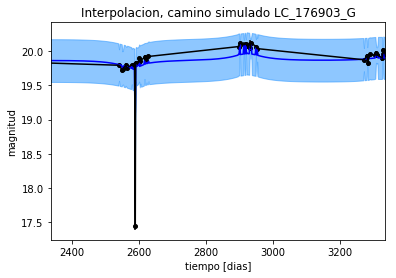

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176903_G')

Text(0.5,1,'Interpolacion, camino simulado LC_176903_G')

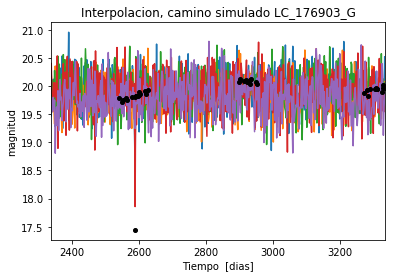

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176903_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 923.272917533
Median: 0.223737325175
Standard deviation: 0.228999524059
68% credibility interval: [ 0.08340776  0.53240771]
95% credibility interval: [ 0.03594132  0.87555837]
99% credibility interval: [ 0.01904543  0.97100357]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 970.207082642
Median: 0.22227545086
Standard deviation: 0.225196015272
68% credibility interval: [ 0.08291409  0.51866866]
95% credibility interval: [ 0.03538562  0.85651342]
99% credibility interval: [ 0.01709418  0.96779018]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 932.208913126
Median: 0.322711285127
Standard deviation: 0.254348082101
68% credib

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1267.83255275
Median: 11.4036720654
Standard deviation: 1.61119525525
68% credibility interval: [  9.56939193  12.60193809]
95% credibility interval: [  7.12329765  13.20387791]
99% credibility interval: [  5.15219744  13.44424127]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 689.41001245
Median: 6.34653333148
Standard deviation: 4.24163744654
68% credibility interval: [  2.70603699  11.37845849]
95% credibility interval: [  1.33153867  16.77260625]
99% credibility interval: [  0.93018556  20.42449546]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 749.34714206
Median: 35.6088584388
Standard deviation: 33.8204713516
68% credibility interval: [ 15.0156666   71.29890432]
95% credibility interval: [   7.410664

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 21414.4874382
Median: 2814524.51368
Standard deviation: 7.04259538566e+41
68% credibility interval: [  2.76153827e-26   1.09494788e+21]
95% credibility interval: [  3.71111092e-51   6.32768415e+34]
99% credibility interval: [  2.30715934e-62   1.18780100e+41]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2419.01930375
Median: 19.8665847348
Standard deviation: 0.0429842611385
68% credibility interval: [ 19.82418463  19.90777595]
95% credibility interval: [ 19.78230774  19.95182287]
99% credibility interval: [ 19.75183179  19.98153628]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 765.063251026
Median: 0.660535514314
Standard deviation: 0.212048750997
68% credibility interval: [ 0.41879707  0.89465297]
95% credibility interval: [ 0.25820991  0.98561668]
99% credibility interval: [ 0.          1.00114194]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 765.063251026
Median: 0.660535514314
Standard deviation: 0.212048750997
68% credibility interval: [ 0.41879707  0.89465297]
95% credibility interval: [ 0.25820991  0.98561668]
99% credibility interval: [ 0.          1.00114194]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 345.922202146
Median: 0.0
Standard deviation: 0.206228411075
68% credibi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1267.83255275
Median: 11.4036720654
Standard deviation: 1.61119525525
68% credibility interval: [  9.56939193  12.60193809]
95% credibility interval: [  7.12329765  13.20387791]
99% credibility interval: [  5.15219744  13.44424127]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2855.45490812
Median: 0.111889175857
Standard deviation: 0.0229494889606
68% credibility interval: [ 0.09248963  0.13636711]
95% credibility interval: [ 0.07767948  0.16691555]
99% credibility interval: [ 0.07008256  0.18881723]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1862.47327951
Median: 1.03536198987
Standard deviation: 0.226670444547
68% credibility interval: [ 0.85126173  1.28404707]
95% credibility interval: [ 0.71577682  1.60889045]
99% credibility interval: [ 0.64013741  1.80818195]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 469.164561253
Median: 6.50594124686e-06
Standard deviation: 52.8114398113
68% credibility interval: [  1.74619202e-20   4.20079670e+01]
95% credibility interval: [  2.80466296e-34   1.88532788e+02]
99% credibility interval: [  7.38506220e-41   3.01947176e+02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 923.272917533
Median: (-1.40578307421-2.88740156311j)
Standard deviation: 1.96097251951
68% credibility interval: [-3.34521630-4.43985083j -0.52406639-3.42542876j]
95% credibility interval: [-5.50129551-5.73185842j -0.22582598-2.44944479j]
99% credibility interval: [-6.10099534-3.34659482j -0.11966598-2.14275239j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 970.207082642
Median: (-1.39659784699+2.8271032803j)
Standard deviation: 1.9435052884
68% credibility interval: [-3.25889133+3.96043123j -0.52096460+4.27021072j]
95% credibility interval: [-5.38163252+3.42261221j -0.22233444+3.36229154j]
99% credibility interval: [-6.08080502+3.79308j    -0.10740587+2.55795198j]
Posterior summary for parameter ar_roots  element 